# Decision Trees

In this notebook, we are going to learn how to deploy a Decision tree model in python.
Here we are going to use the famous "Titanic" Dataset.

First, let's take a look at the dataset 

In [29]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset and EDA

In [30]:

data_titanic = pd.read_csv('titanic.csv')

In [31]:

data_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Explore the target (Survived column)

In [32]:
data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:

data_titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [34]:
data_titanic['Survived'].isnull().sum()

0

In [35]:
X = data_titanic[['Sex','Age','Cabin','Fare']] # For This Tutorial , we are going to stick to Sex,Age,Cabin and Fare

y = data_titanic['Survived']

### Feature Engineering

In [36]:

#import category encoders
#imput median Age for NA age values
# Logical check , Value if check is true,Value if check is false

age_code = np.where(data_titanic['Age'].isnull(),28,data_titanic['Age'])

data_titanic['Age'] = age_code

In [37]:

print('---------------------------------------------------------------')

from sklearn import tree
from sklearn import preprocessing

#initialize label encoder
label_encoder = preprocessing.LabelEncoder()

#convert sex variable to numeric 
encod_sex = label_encoder.fit_transform(data_titanic['Sex'])

encod_cabin = label_encoder.fit_transform(data_titanic['Cabin'])



---------------------------------------------------------------


In [38]:
predictors = pd.DataFrame({'sex': encod_sex, 'cabin': encod_cabin, 'age': data_titanic['Age'], 'fare': data_titanic['Fare']})

In [39]:
predictors

,sex,cabin,age,fare
0,1,147,22.0,7.2500
1,0,81,38.0,71.2833
2,0,147,26.0,7.9250
3,0,55,35.0,53.1000
4,1,147,35.0,8.0500
...,...,...,...,...
886,1,147,27.0,13.0000
887,0,30,19.0,30.0000
888,0,147,28.0,23.4500
889,1,60,26.0,30.0000


### Split data into training - testing

In [40]:


print('--------------------------------------------------')

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(predictors, y, test_size=0.2 , random_state = 42) 

--------------------------------------------------


In [41]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((712, 4), (179, 4))

### Decision Tree Classifier with criterion gini index

In [42]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0) #Descition Tree model)

# fit the model
clf_gini.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [43]:

# for prediction of y from unseen data 
y_pred_gini = clf_gini.predict(X_test)  



In [44]:
#from sklearn.metrics import accuracy_score

#print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

from sklearn.metrics import accuracy_score

print('model accuracy score with criterion gini index :  {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

model accuracy score with criterion gini index :  0.7821


Check for overfitting and underfitting

In [45]:
# print the scores on training and test set


#print the scores on training and test set

print('training set score: {:.4f}'.format(clf_gini.score(X_train,y_train)))
print('test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

training set score: 0.8006
test set score: 0.7821


### Visualize decision-trees

[Text(0.5, 0.875, 'X[0] <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(0.25, 0.625, 'X[1] <= 144.5\ngini = 0.386\nsamples = 245\nvalue = [64, 181]'),
 Text(0.125, 0.375, 'X[2] <= 3.0\ngini = 0.082\nsamples = 70\nvalue = [3, 67]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1875, 0.125, 'gini = 0.056\nsamples = 69\nvalue = [2, 67]'),
 Text(0.375, 0.375, 'X[3] <= 10.481\ngini = 0.454\nsamples = 175\nvalue = [61, 114]'),
 Text(0.3125, 0.125, 'gini = 0.497\nsamples = 54\nvalue = [25, 29]'),
 Text(0.4375, 0.125, 'gini = 0.418\nsamples = 121\nvalue = [36, 85]'),
 Text(0.75, 0.625, 'X[2] <= 6.5\ngini = 0.303\nsamples = 467\nvalue = [380, 87]'),
 Text(0.625, 0.375, 'X[3] <= 20.825\ngini = 0.434\nsamples = 22\nvalue = [7, 15]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.6875, 0.125, 'gini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(0.875, 0.375, 'X[1] <= 121.0\ngini = 0.271\nsamples = 445\nvalue = [373, 72]'),
 Text

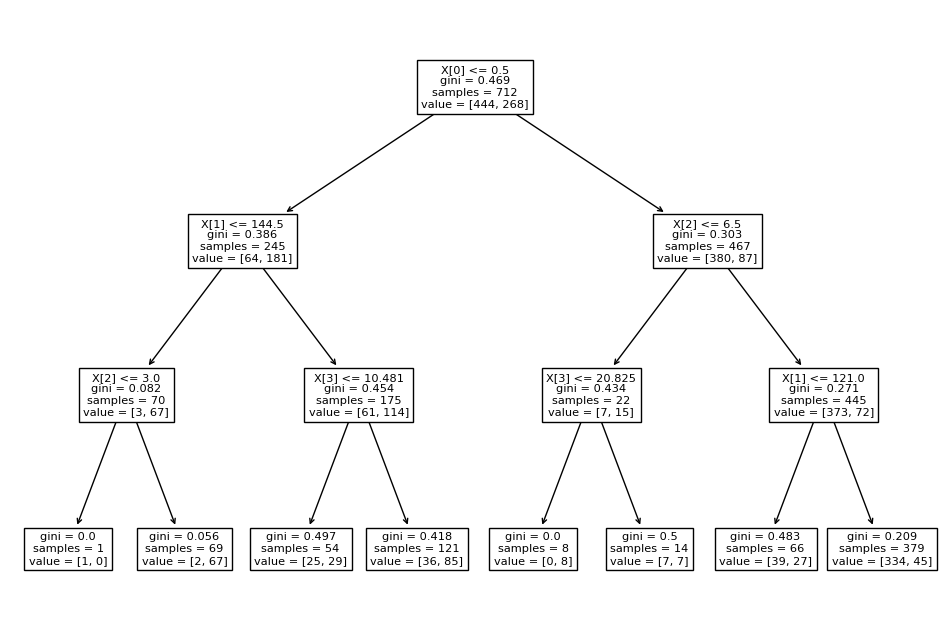

In [49]:


plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train,y_train))

###  Decision Tree Classifier with criterion entropy 

In [51]:

clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_entropy.fit (X_train, y_train)  #fit the model

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [52]:


y_pred_en = clf_entropy.predict(X_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7877


We can see that this new model performs better compare to the Gini entropy model

> #### Excersice
> Can you tune the hyperparameters in the classifier to make the model more accurate?

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Create parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Create a DecisionTree Classifier
tree1 = DecisionTreeClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=tree1, param_grid=param_grid, cv=5)

# Fit GridSearch to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_


In [54]:
print('best paramis :',best_params)

best paramis : {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}


In [ ]:
## we have to apply this params to the model again for better results